In [19]:
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import measure,feature

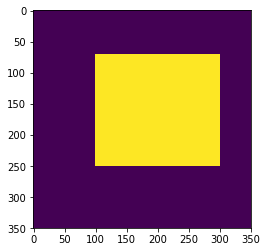

In [67]:
#creating a mock up frame
#since this is just proof of concept; making the frame size same as image of interest
dim=(350,350)
f_arr=np.zeros(dim)
f_arr[70:250, 100:300]=1
plt.imshow(f_arr)

In [96]:
def apply_label(label,image):
    a=np.where(label==1)
    row1=min(a[0])
    row2=max(a[0])
    col1=min(a[1])
    col2=max(a[1])
    print (str(row1)+':'+str(row2)+' ,  '+str(col1)+':'+str(col2))
    sub_image=image[row1:row2,col1:col2]
    Emin=np.min(sub_image)
    Emax=np.max(sub_image)
    print('Emin: '+str(Emin))
    print('Emax: '+str(Emax))
    image=(image-Emin)/(Emax-Emin)
    image[0:row1]=0
    image[row2:]=0
    image[:,:col1]=0
    image[:,col2:]=0    
    plt.figure(figsize=(10,10))  
    print('Verifying the needed image is selected')
    plt.subplot(221),plt.imshow(image)
    plt.subplot(222),plt.imshow(label)
    return image

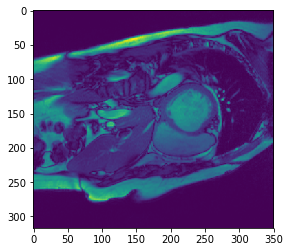

In [97]:
image_path='/masvol/output/acdc/norm/1/3/images/patient004/patient004_slice1_frame1.nii.npy'
image1=np.load(image_path)
plt.imshow(image)

70:249 ,  100:299
Emin: 1
Emax: 866
Verifying the needed image is selected


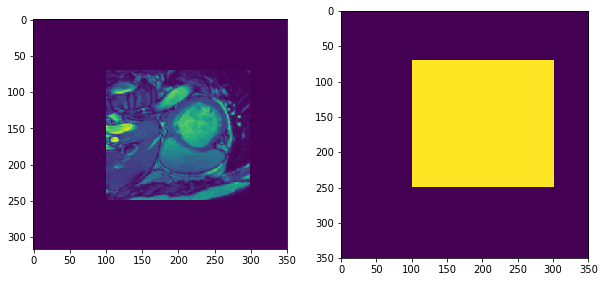

In [98]:
im=apply_label(f_arr,image1)

In [100]:
np.min(im)

0.0

In [102]:
im[im>0.5]

array([0.52601156, 0.51676301, 0.58381503, ..., 0.50635838, 0.51907514,
       0.52138728])